# Credit Risk Analysis

Here we have different features of a credit holders in past and we have to predict if a new loan application will be in risk or not. 

1. Here I have explored the data
1. Work on feature creation (coming soon)
1. Model building, tuning and testing (coming soon)


As per the creator of this dataset the **Defaulted**, **Charged Off** and **Does not meet the credit policy. Status:Charged Off** are the risky loans.<br>
So Now are plan is to
1. we'll try to explore this different categories saparetly
1. Then at the time of model building, we'll divide the loan types in either risky or non risky.

<body>
  <div style="background-color:#5b4fff;width:100%;padding:5px;">
      <p style="color:#FFFFFF;text-align:center;font-size:20px;font-type:poppins;"><b>Please do UPVOTE,COMMENT and SHARE if you like my work</b></p>  
  </div>
</body>

In [1]:
!pip install xlrd
!pip install openpyxl

     |████████████████████████████████| 96 kB 369 kB/s 
     |████████████████████████████████| 243 kB 390 kB/s 


In [2]:
#importing helping hands
import time 
import os 
import sys

import pandas as pd
import numpy as np

from termcolor import cprint 
import seaborn as sns
sns.set(rc ={'figure.figsize':(25,7)})

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the datset
train_df = pd.read_csv("../input/credit-risk-dataset/loan/loan.csv")
loan_status = pd.read_csv("../input/LoanMetaData/LoanStats.csv")

In [4]:
def columns_types(dataset):
    #columns_types function will print different dtypes available in all the columns with the counts
    int_col = len(dataset.select_dtypes('int').columns)
    float_col = len(dataset.select_dtypes('float').columns)
    object_col = len(dataset.select_dtypes('object').columns)
    print('There are {} int, {} float and {} object type features available in the training data'.format(int_col, float_col, object_col-1))

columns_types(train_df)

There are 2 int, 49 float and 22 object type features available in the training data


In [5]:
def description(column_name):
    #description function gives you meaning of the feature 
    return loan_status.loc[loan_status.LoanStatNew == column_name].Description.values[0]

def print_description(column_list):
    #print_description function prints meanings and Null value Percentages of a feature
    for i, column in enumerate(column_list):
        color = 'grey'
        if column == 'loan_status':
            color = 'green'
        try:
            cprint("[{}]:{}={} [{}% Null]".format(i,column, description(column), (train_df[column].isna().sum()/len(train_df))*100), color)
        except Exception as e:
            cprint("[{}]:{}".format(i, column), 'red')
            
train_columns = train_df.columns
print_description(train_columns)

[0]:id=A unique LC assigned ID for the loan listing. [0.0% Null]
[1]:member_id=A unique LC assigned Id for the borrower member. [0.0% Null]
[2]:loan_amnt=The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. [0.0% Null]
[3]:funded_amnt=The total amount committed to that loan at that point in time. [0.0% Null]
[4]:funded_amnt_inv=The total amount committed by investors for that loan at that point in time. [0.0% Null]
[5]:term=The number of payments on the loan. Values are in months and can be either 36 or 60. [0.0% Null]
[6]:int_rate=Interest Rate on the loan [0.0% Null]
[7]:installment=The monthly payment owed by the borrower if the loan originates. [0.0% Null]
[8]:grade=LC assigned loan grade [0.0% Null]
[9]:sub_grade=LC assigned loan subgrade [0.0% Null]
[10]:emp_title=The job title supplied by the Borrower when applying for the loan.* [5.799325879922783% Null]
[11]:

In [6]:
#here we are eliminating columns having missing values 97% and more.
for col in train_df.columns:
    if ((train_df[col].isna().sum()/len(train_df))*100) >= 97:
        train_df = train_df.drop([col], axis=1)
        
columns_types(train_df)

There are 2 int, 33 float and 21 object type features available in the training data


This loan_status in the dataset<br>
t1="Charged Off"<br>
t2="Current"<br>
t3="Default"<br>
t4="Does not meet the credit policy. Status:Charged Off"<br>
t5="Does not meet the credit policy. Status:Fully Paid"<br>
t6="Fully Paid"<br>
t7="In Grace Period"<br>
t8="Issued"<br>
t9="Late (16-30 days)"<br>
t10="Late (31-120 days)"<br>

# **Exploring the Dataset**

In [7]:
loan_status_count = train_df[['id','loan_status']].groupby(['loan_status']).size().reset_index(name = 'count')
total_loans = loan_status_count['count'].sum()
loan_status_count['percentage(%)'] = ((loan_status_count['count'] / total_loans)*100).astype('float')

print(loan_status_count)

                                         loan_status   count  percentage(%)
0                                        Charged Off   45248       5.099061
1                                            Current  601779      67.815330
2                                            Default    1219       0.137371
3  Does not meet the credit policy. Status:Charge...     761       0.085758
4  Does not meet the credit policy. Status:Fully ...    1988       0.224031
5                                         Fully Paid  207723      23.408600
6                                    In Grace Period    6253       0.704659
7                                             Issued    8460       0.953369
8                                  Late (16-30 days)    2357       0.265614
9                                 Late (31-120 days)   11591       1.306206


* Categories like **"Charged Off"**, **"Default"**, **"Does not meet the credit policy. Status:Charged Off"** are the onces which are risky.
* There are total **47228 (5.32%)** of risky loans available in training data.
* There are total **840516 (94.68%)** of non-risky loans available in training data.

## Here we will focus on risky loans 

In [8]:
#getting the dataframe of specific loan_status
charged_off = train_df.loc[train_df['loan_status'] == 'Charged Off']
default = train_df.loc[train_df['loan_status'] == 'Default']
nopol_charged_off = train_df.loc[train_df['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']
fully_paid = train_df.loc[train_df['loan_status'] == 'Fully Paid']

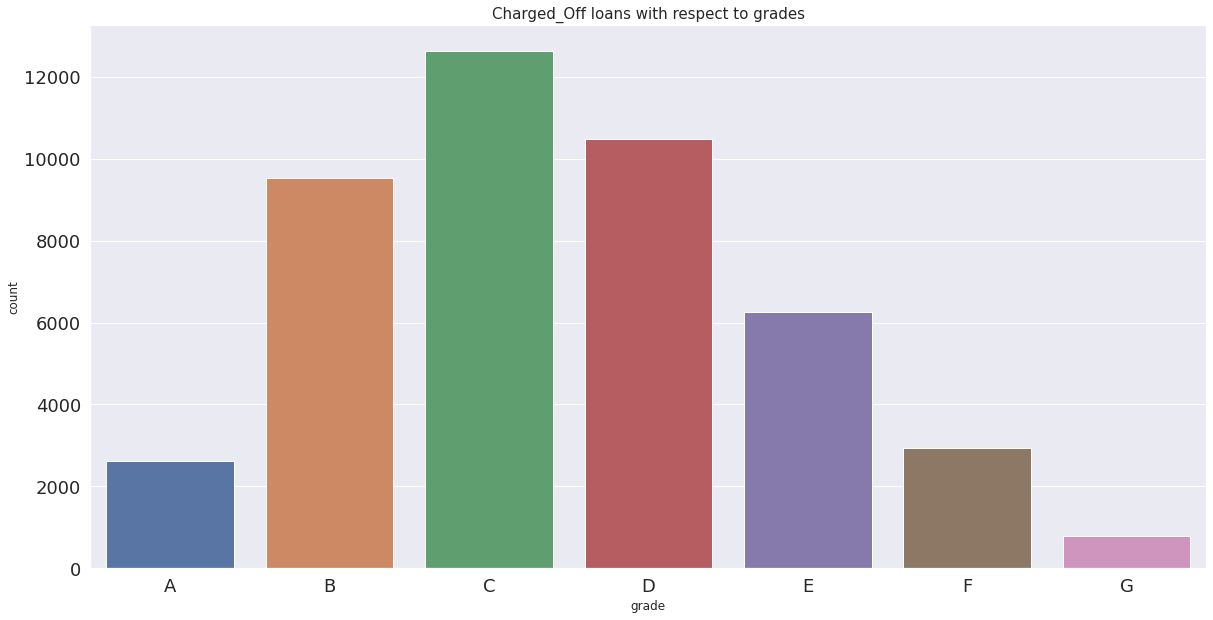

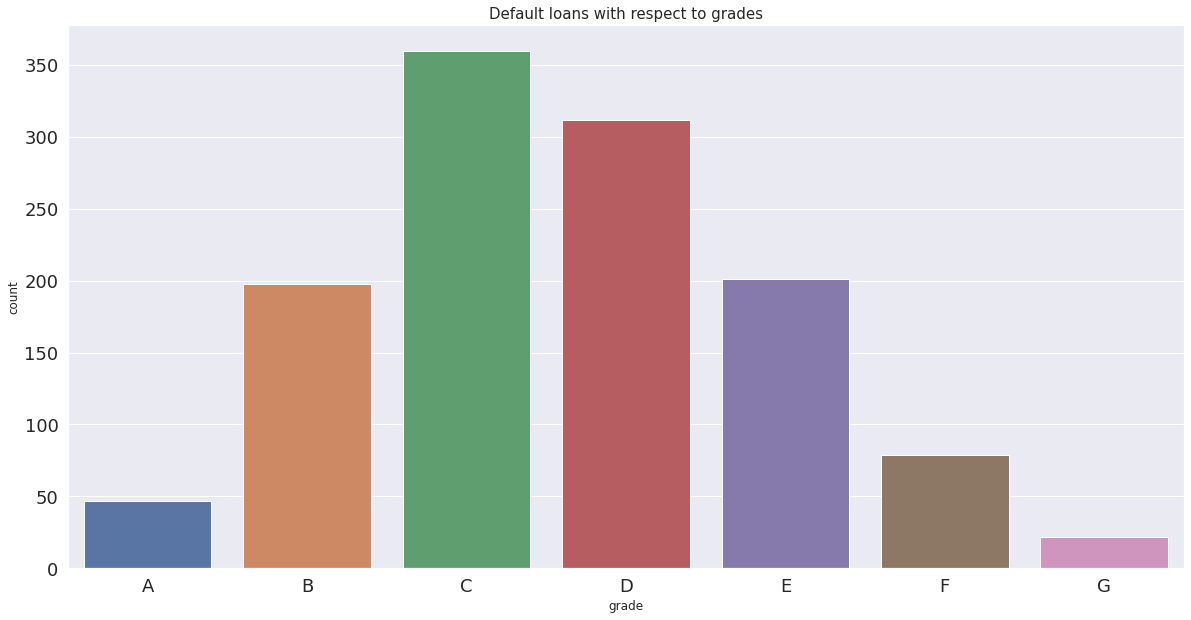

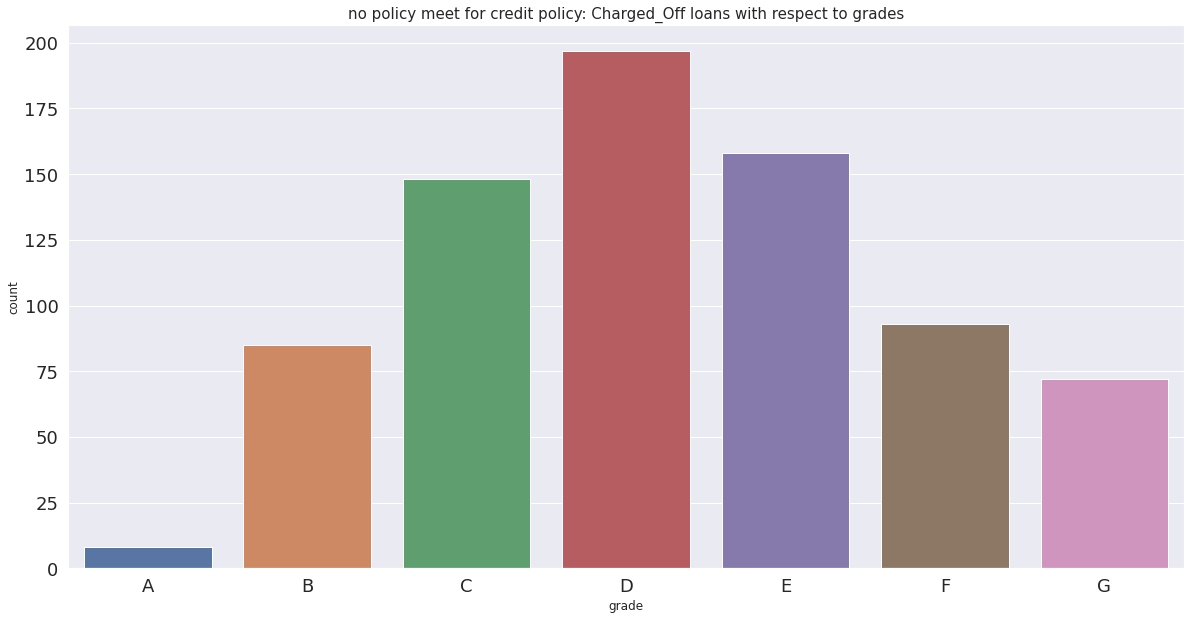

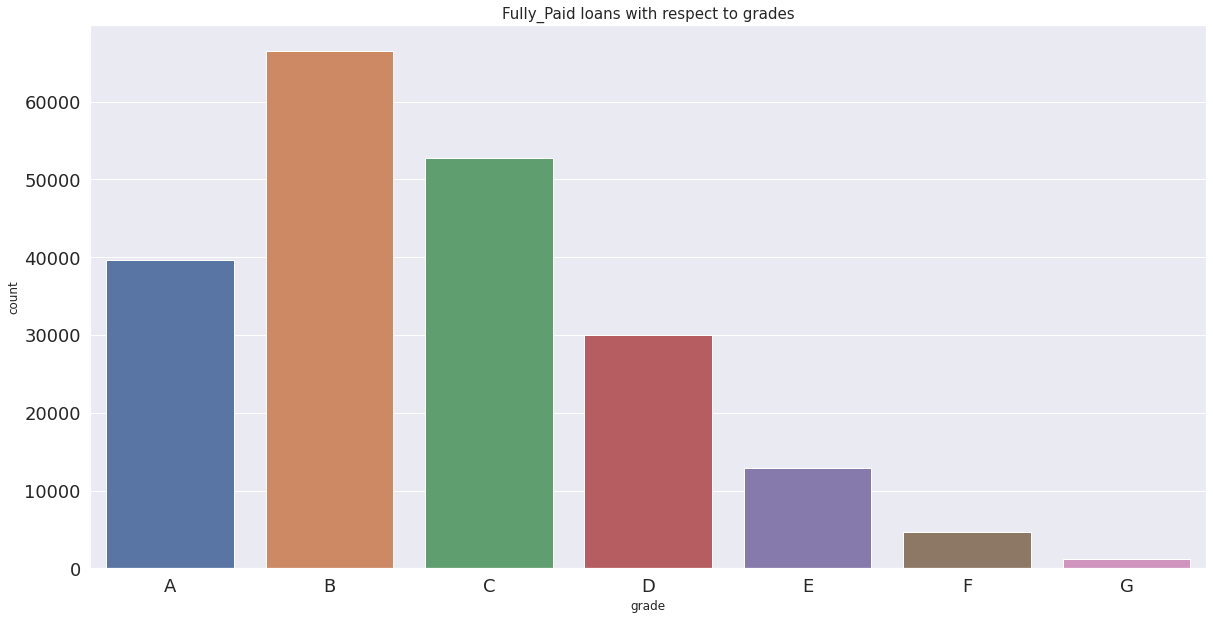

In [9]:
sns.set(rc ={'figure.figsize':(20,10)})
def loan_grade(data, name):
    data_grade = data.groupby(['grade']).size().reset_index(name='count')
    data_grade['percentage_(%)'] = (data_grade['count']/len(data))*100

    sns.barplot(x = 'grade', y = 'count', data = data_grade)
    plt.title('{} loans with respect to grades'.format(name), fontsize = 15)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

loan_grade(charged_off, 'Charged_Off')
loan_grade(default, 'Default')
loan_grade(nopol_charged_off, 'no policy meet for credit policy: Charged_Off')
loan_grade(fully_paid, 'Fully_Paid')

#### loan Grade
loan grades are the grades assigned to a loan based on borrowers past credit history. The poor the history is the lower a grade it gets.

* loans of grades B C and D are making up more than 70% of charged off loans.
* similar situation is with defaulted loans.
* condition becomes worse with no policy meet loans.
* here we can observe a clear pattern that as the loan grade goes from A to G the Risk increases as well.

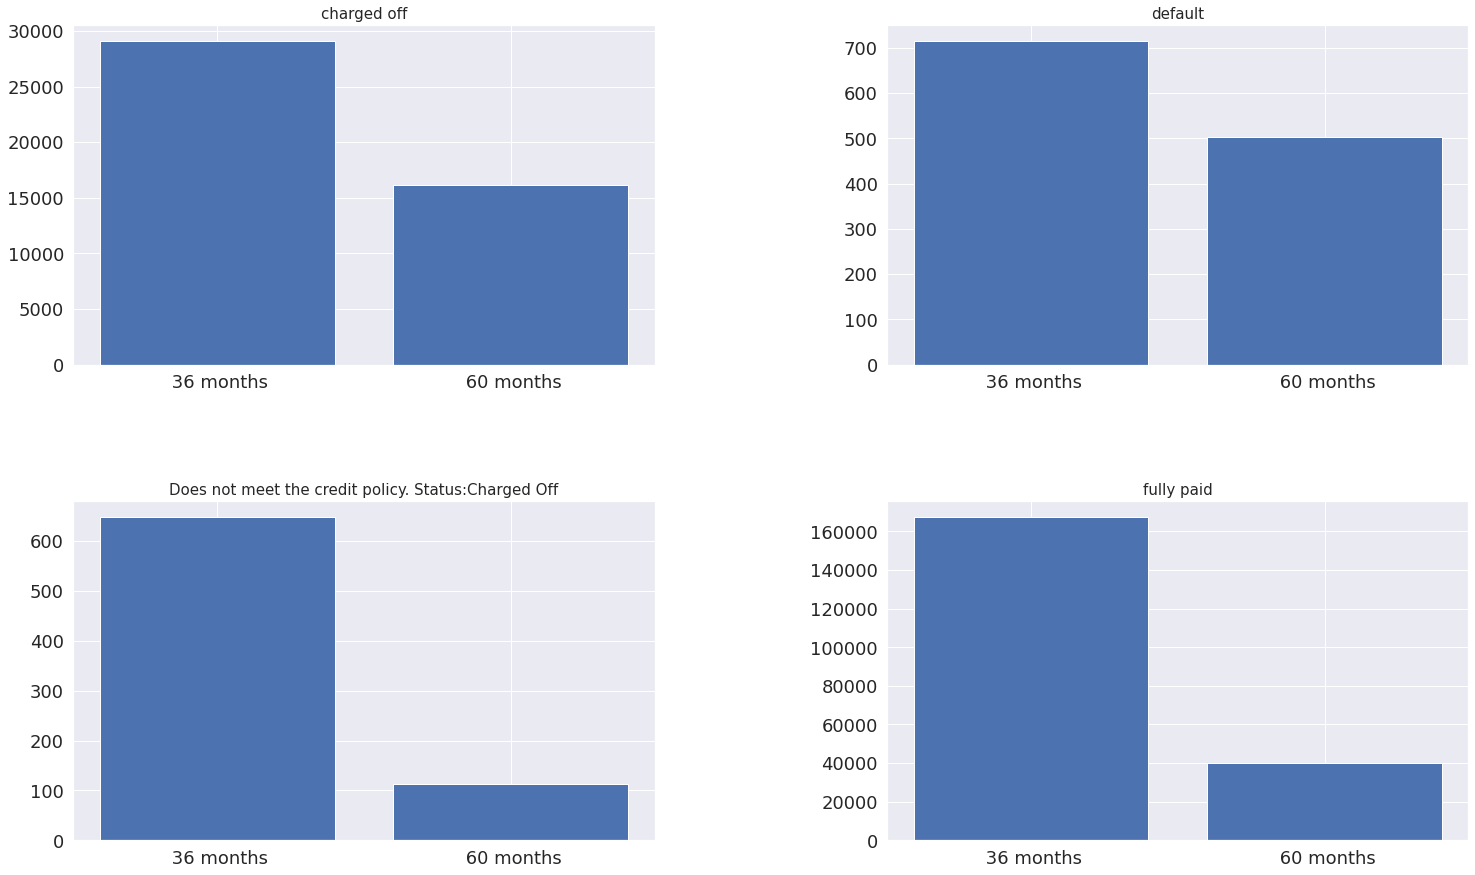

In [10]:
terms1 = charged_off.groupby(['term']).size().reset_index(name='count')
terms2 = default.groupby(['term']).size().reset_index(name='count')
terms3 = nopol_charged_off.groupby(['term']).size().reset_index(name='count')
terms4 = fully_paid.groupby(['term']).size().reset_index(name='count')

figure, axis = plt.subplots(2, 2, figsize=(25,15))
axis[0,0].bar(x = 'term', height = 'count', data = terms1)
axis[0,0].set_title('charged off', fontdict = {'fontsize':15})
axis[0,0].tick_params(labelsize=18)

axis[0,1].bar(x = 'term', height = 'count', data = terms2)
axis[0,1].set_title('default',fontdict = {'fontsize':15})
axis[0,1].tick_params(labelsize=18)

axis[1,0].bar(x = 'term', height = 'count', data = terms3)
axis[1,0].set_title('Does not meet the credit policy. Status:Charged Off',fontdict = {'fontsize':15})
axis[1,0].tick_params(labelsize=18)

axis[1,1].bar(x = 'term', height = 'count', data = terms4)
axis[1,1].set_title('fully paid', fontdict = {'fontsize':15})
axis[1,1].tick_params(labelsize=18)

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()

#### Loan Duration
people are prefering short term loans over the long one.

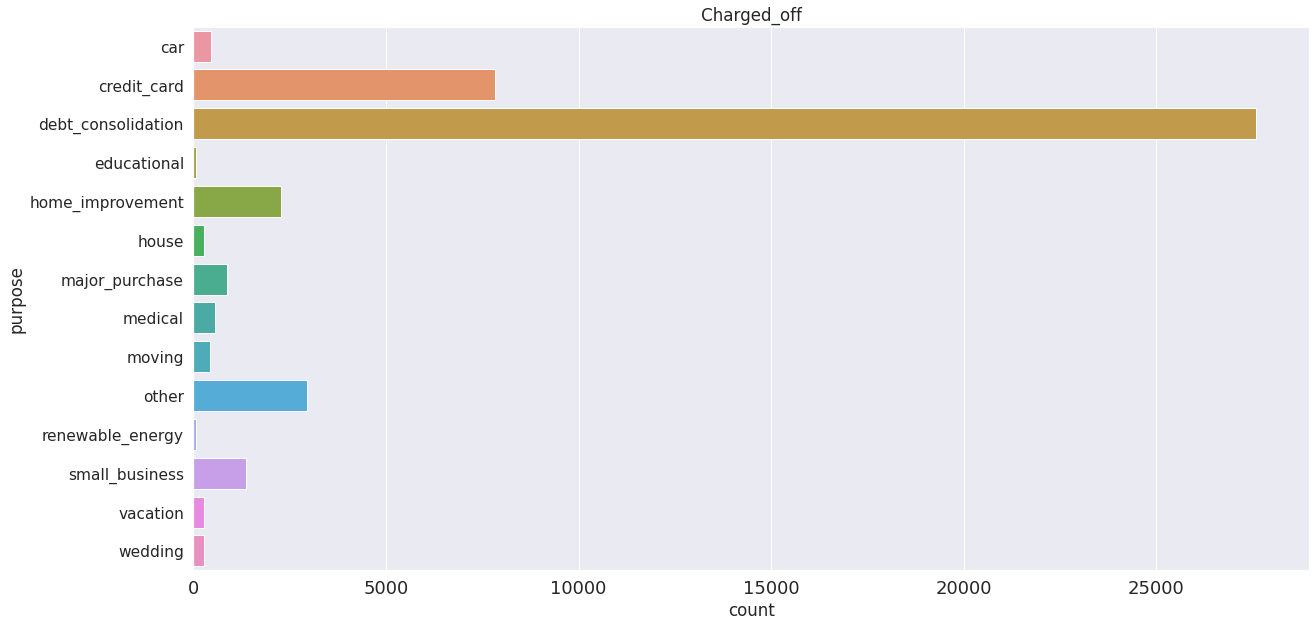

In [11]:
charged_off_purpose = charged_off.groupby(['purpose']).size().reset_index(name='count')
charged_off_purpose['percentage_(%)'] = (charged_off_purpose['count']/len(charged_off))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = charged_off_purpose)
plt.title('Charged_off')
plt.xticks(fontsize=18)
plt.show()

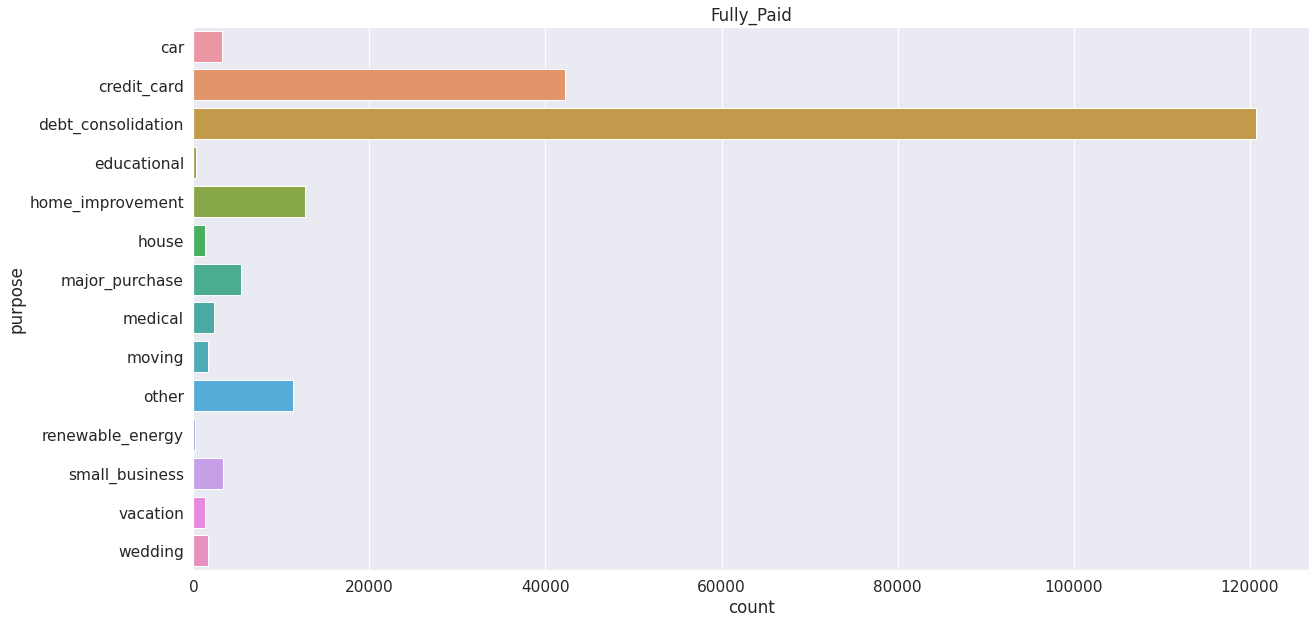

In [12]:
fully_paid_purpose = fully_paid.groupby(['purpose']).size().reset_index(name='count')
fully_paid_purpose['percentage_(%)'] = (fully_paid_purpose['count']/len(fully_paid))*100

sns.set(rc ={'figure.figsize':(20,10)})
sns.set(font_scale=1.4)
sns.barplot(x = 'count', y = 'purpose', data = fully_paid_purpose)
plt.title('Fully_Paid')
plt.show()

##### Debt Consolidation
*  It's type of personal financing tool used to pay down your other ongoing loans.
*  One should look for such facilities when they are getting lower rate of interest on DC then the ongoing loans, using this you have to pay low rates and the repayment can done in short time.
*  Down side is people opt for this when they are unable to pay ongoing loans and they do take another higher interest rate DC loan for repayment of the ongoing ones.
*  here in training dataset, almost 60% of the loans are of this type.

##### Credit Card
*  it's the second most alloted loan to the customers.
*  23% loans are credit loans in training data.

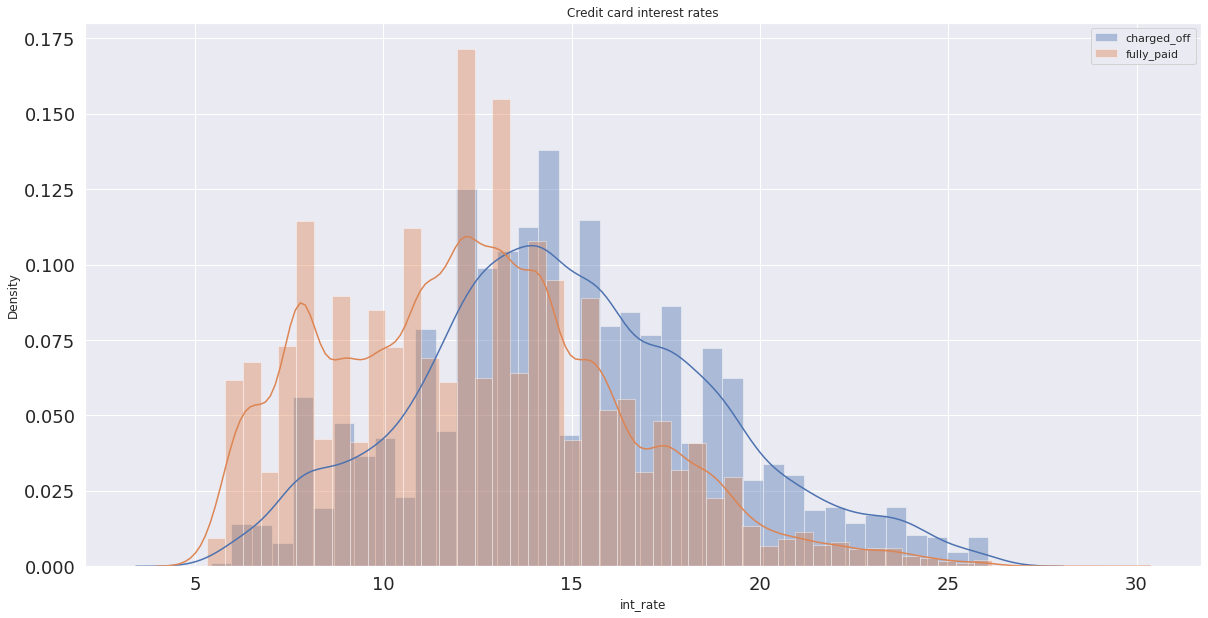

In [13]:
chargedoff_credit_card = charged_off[charged_off['purpose'] == 'credit_card']['int_rate']
fullypaid_credit_card = fully_paid[fully_paid['purpose'] == 'credit_card']['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})
sns.distplot(chargedoff_credit_card, label = 'charged_off', hist = True)
sns.distplot(fullypaid_credit_card, label = 'fully_paid', hist = True)

plt.legend()
plt.title('Credit card interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

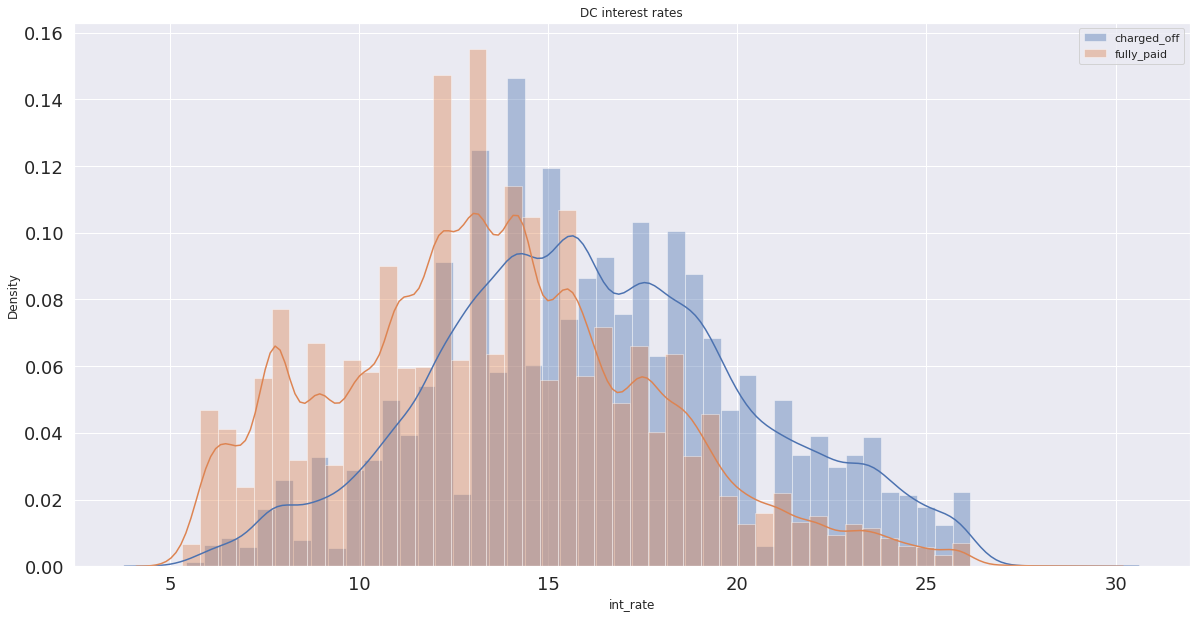

In [14]:
chargedoff_debtconsolidation = charged_off[charged_off['purpose'] == 'debt_consolidation']['int_rate']
fullypaid_debtconsolidation = fully_paid[fully_paid['purpose'] == 'debt_consolidation']['int_rate']

sns.set(rc ={'figure.figsize':(20,10)})
sns.distplot(chargedoff_debtconsolidation, label = 'charged_off', hist = True)
sns.distplot(fullypaid_debtconsolidation, label = 'fully_paid', hist = True)

plt.legend()
plt.title('DC interest rates')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

#### Interest Rate
* Nothing abnormal with the interest rates for all the risky categories.
* The distribution of rate of interest for fully_paid is a bit right skewed. 
* the credit cards and debt consolidation loans charges more compared to other types of loan.

In [15]:
train_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

### Correlation of Risky types with Numerical Data

* it's hard to find correlation in a unbalanced dataset. 
* we will do 50-50 of a risky class - other classes and then we'll try to find the correlation.

t1 = Charged Off<br>
t2 = Current<br>
t3 = Default<br>
t4 = Does not meet the credit policy status: Charged Off<br>
t5 = Does not meet the credit policy status: Fully Paid<br>
t6 = Fully Paid<br>
t7 = In Grace Period<br>
t8 = Issued<br>
t9 = Late(16-30 days)<br>
t10 = Latee(31-120 days)<br>

In [16]:
train_df_temp = train_df.copy()
train_df_temp[['t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']] = pd.get_dummies(train_df['loan_status'])

#default 1219 #charged off 45248 #nopol charged off 761
no_charged_off = train_df_temp[train_df['loan_status'] != 'Charged Off'].sample(n = 45248, replace = False, random_state = 42)
no_default = train_df_temp[train_df['loan_status'] != 'default'].sample(n = 1219, replace = False, random_state = 41)
no_nopol_charged_off = train_df_temp[train_df['loan_status'] != 'default'].sample(n = 761, replace = False, random_state = 45)

In [17]:
sns.set(rc ={'figure.figsize':(20,10)})

def correlation_heatmap(data, no_data, target, title):
    #correlation_heatmap function plots heatmap for target variable with Numerical varible
    data[target] = 1
    data.drop(['loan_status'], axis=1)
    
    targets = ['id','member_id','t1','t2','t3','t4','t5','t6','t7','t8','t9','t10']
    targets.remove(target)
    
    data_combined = pd.concat([data, no_data])
    data_final = data_combined.drop(columns = targets, axis=1)

    target_columns = [target]
    numerical_columns = list(data_final.select_dtypes(include='int').columns) + list(data_final.select_dtypes(include='float').columns)

    def numerical_columns_batch(columns, n):
        for i in range(0,len(columns)-10,n):
            start = i
            end = i+n if i+n <= (len(columns)-10) else len(columns)-10

            yield (columns[start:end] + target_columns)

    for columns in numerical_columns_batch(numerical_columns, 50):
        a = data_final[columns].corr(method='pearson')
        sns.heatmap(a, vmin = -1, center = 0, vmax = 1, linewidths=.5, cmap="YlGnBu")
        
        plt.title(title)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.show()

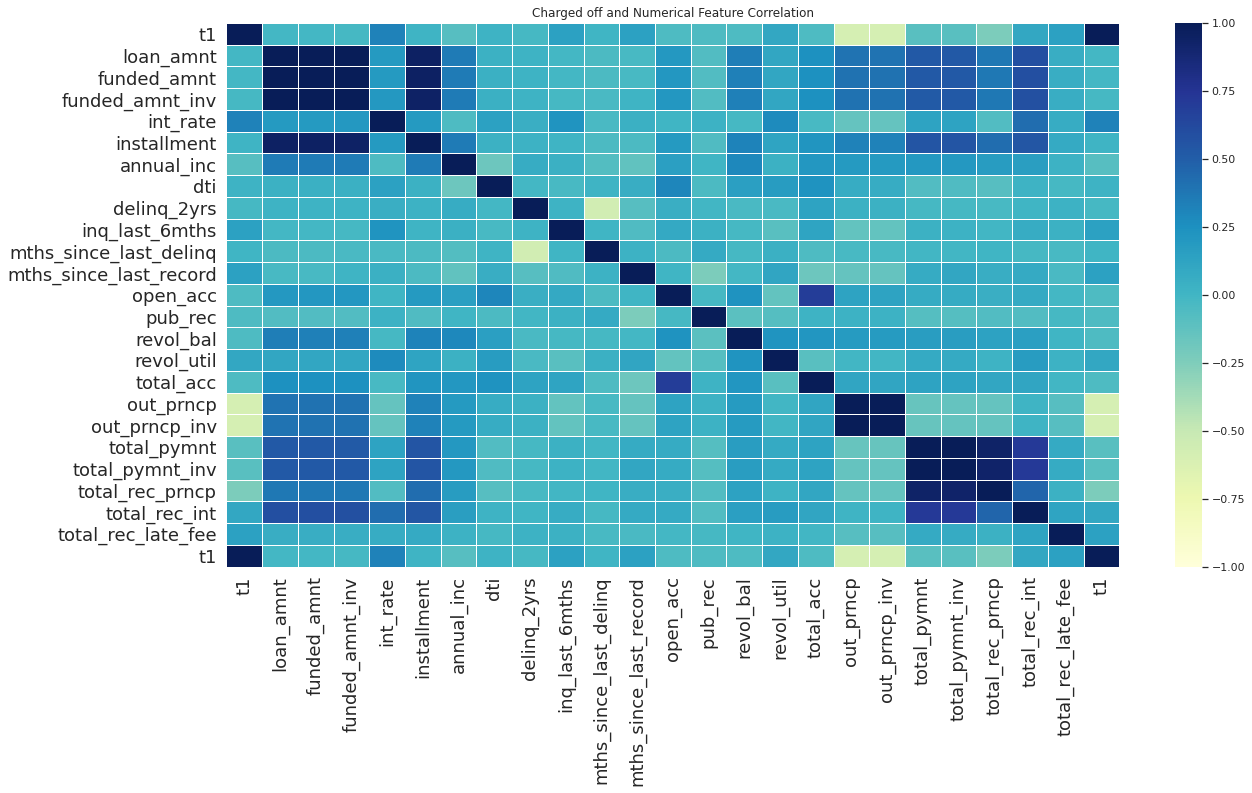

In [18]:
title = 'Charged off and Numerical Feature Correlation'
correlation_heatmap(charged_off, no_charged_off, 't1', title)

Loans **charged off** are negatively correalted with the **out_prncp_inv** [Remaining outstanding principal for portion of total amount funded by investors] because the out_prncp_inv is 0 for all the charged off loans.

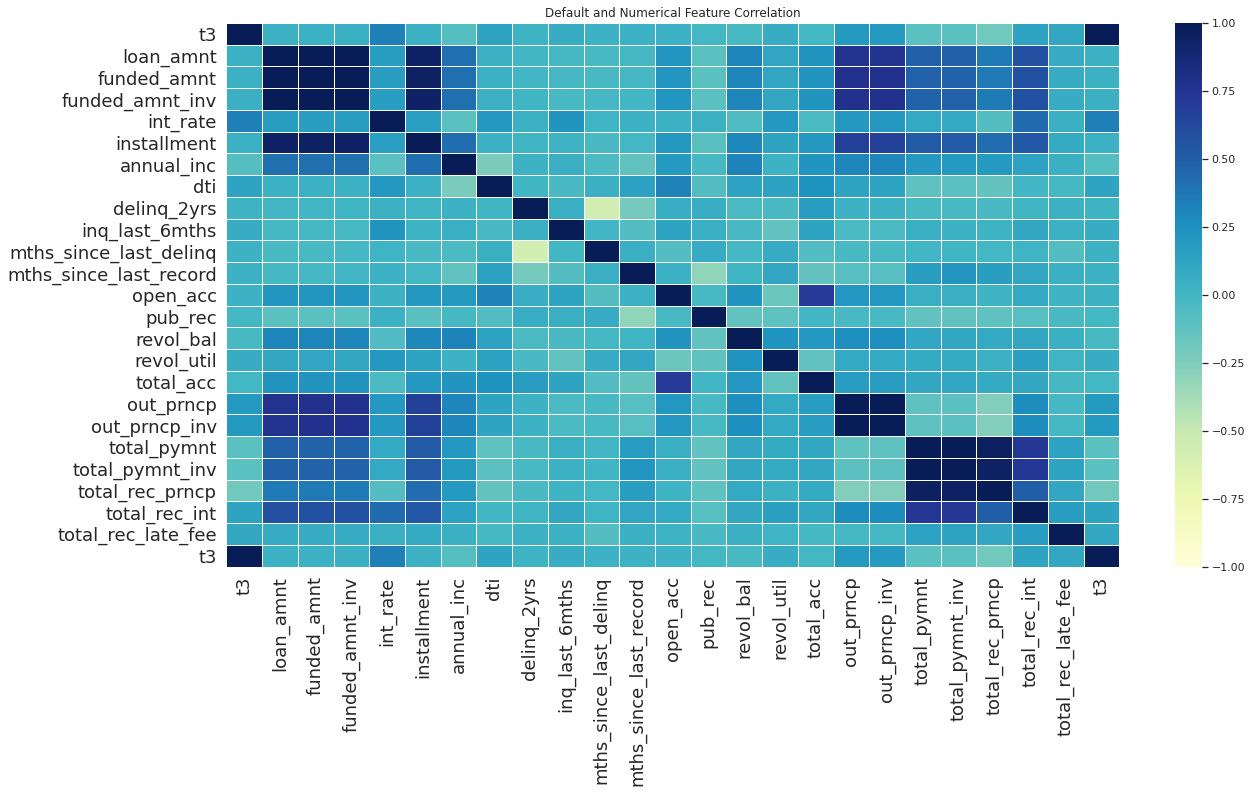

In [19]:
title = 'Default and Numerical Feature Correlation'
correlation_heatmap(default, no_default, 't3', title)

Defaults are loosely related with interest rates.

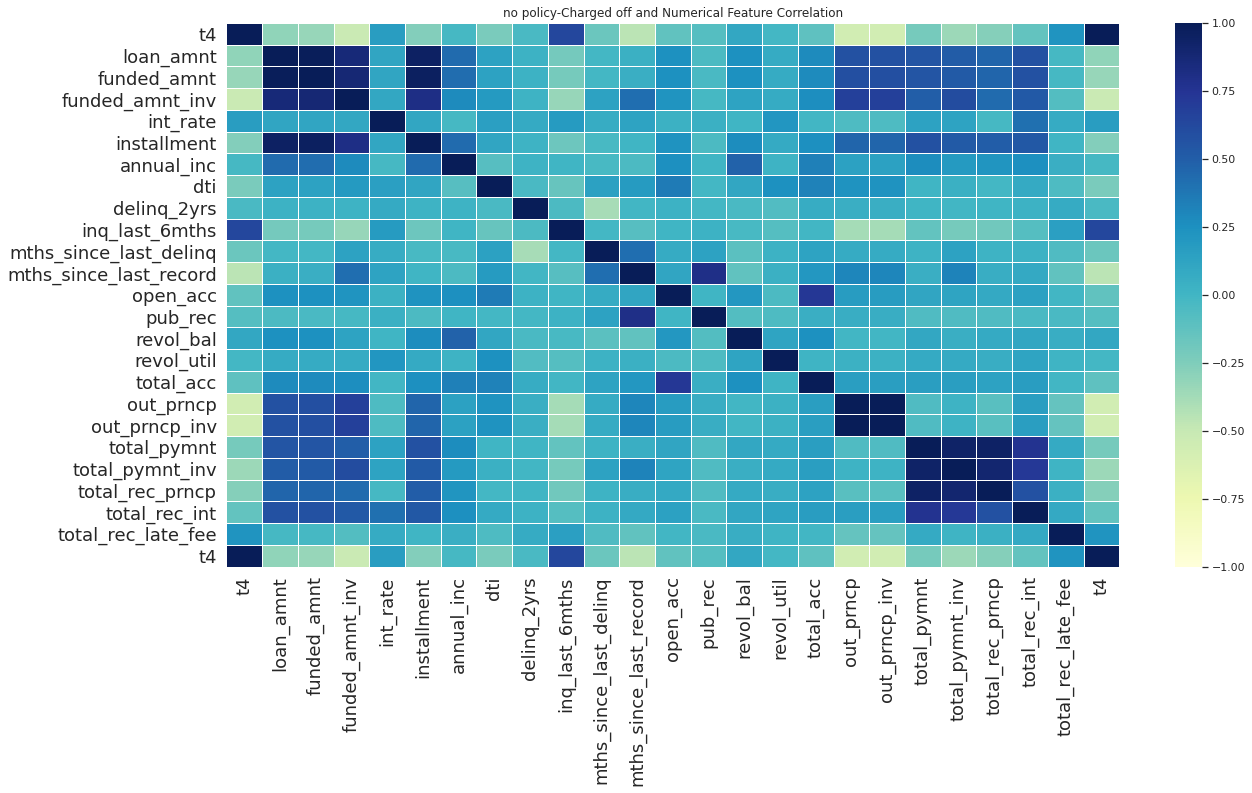

In [20]:
title = 'no policy-Charged off and Numerical Feature Correlation'
correlation_heatmap(nopol_charged_off, no_nopol_charged_off, 't4', title)

**inq_last_6mths** [number of inquires in last 6 months for loans (excluding auto and mortgage inquiries)] is positively correlated with the charged off